In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, RobustScaler

In [2]:
pwd

'C:\\Users\\635718\\Desktop\\DataScience\\HackerEarth\\FutureDatathon'

In [3]:
sample = pd.read_csv('./Q2RecData/sampleSubmission.csv')

In [ ]:
sample.head(2)

In [4]:
requiredCustomer = sample['customerID']

In [5]:
requiredCustomer.shape

(39205,)

In [6]:
# load product and sample file
products = pd.read_csv('./Q2RecData/products.csv', nrows=50000)

In [87]:
products['month_of_transaction'] = pd.to_datetime(products['transactionDate']).dt.month

In [101]:
products['day_of_transaction'] = pd.to_datetime(products['transactionDate']).dt.weekday

In [89]:
products.columns

Index(['customerID', 'DOB', 'Gender', 'State', 'PinCode', 'transactionDate',
       'store_code', 'store_description', 'till_no',
       'transaction_number_by_till', 'promo_code', 'promotion_description',
       'product_code', 'product_description', 'sale_price_after_promo',
       'discountUsed', 'month_of_transaction', 'day_of_transaction'],
      dtype='object')

In [11]:
#Missing Data
total = products.isnull().sum().sort_values(ascending=False)
percent = (products.isnull().sum()/products.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
promotion_description,38941,0.77882
State,15878,0.31756
Gender,3271,0.06542
discountUsed,0,0.00000
sale_price_after_promo,0,0.00000
product_description,0,0.00000


In [12]:
products['promo_code'].unique()

array(['NONPROMO', '0000856620', '0001074545', ..., '0001243555',
       '0001243258', '0001243694'], dtype=object)

In [17]:
products[products['promo_code'] == 'NONPROMO'].shape

(38941, 16)

In [102]:
tom = products[(products['product_code'] == 108100382)]
saleprice = products[(products['product_code'] == 108100382)]['sale_price_after_promo']
data = pd.merge(pd.DataFrame(tom),pd.DataFrame(saleprice))

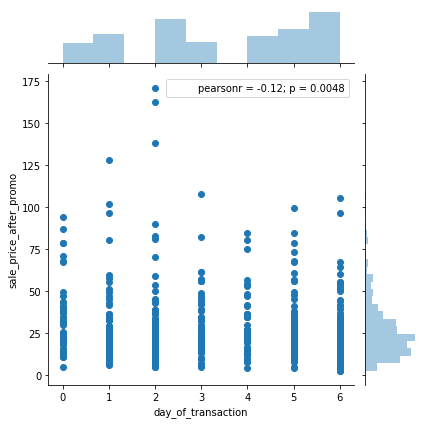

In [103]:
sns.jointplot(x='day_of_transaction',y='sale_price_after_promo',data=data)

In [105]:
products[(products['product_code'] == 108100382) & (products['store_code'] == 2655)][['product_description',
                                                                                       'sale_price_after_promo',
                                                                                      'promo_code',
                                                                                      'transactionDate',
                                                                                      'month_of_transaction',
                                                                                     'day_of_transaction']].sort_values(by=['month_of_transaction']).head(5)

,product_description,sale_price_after_promo,promo_code,transactionDate,month_of_transaction,day_of_transaction
41623,TOMATO LOOSE,16.95,NONPROMO,2017-01-25,1,2
15747,TOMATO LOOSE,11.63,NONPROMO,2017-01-04,1,2
32543,TOMATO LOOSE,29.00,NONPROMO,2016-01-24,1,6
27307,TOMATO LOOSE,14.62,NONPROMO,2016-01-03,1,6
20210,TOMATO LOOSE,9.45,NONPROMO,2017-01-24,1,1


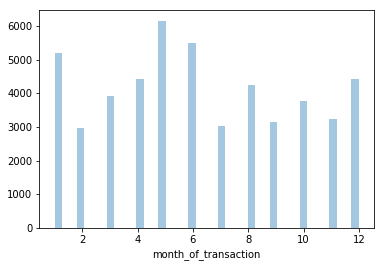

In [77]:
import seaborn as sns
%matplotlib inline
sns.distplot(products['month_of_transaction'], kde=False)

In [93]:
products[(products['store_code'] == 2655) & (products['promo_code'] == 'NONPROMO')].groupby(by=['store_code','product_code'])['customerID'].count().sort_values(ascending=False).head()

store_code  product_code
2655        108100382       284
            300111517       195
            300785150       187
            108100308       186
            300776410       184
Name: customerID, dtype: int64

In [132]:
products.groupby(by='customerID')['product_code'].count().sort_values(ascending=False).head(2)
#count().sort_values(ascending=False).head() #BBID_20445646    

customerID
BBID_20415    137
BBID_20413     67
Name: product_code, dtype: int64

In [23]:
misfit_customers = list(set(sample['customerID']) - set(products['customerID']))

In [24]:
len(misfit_customers)

39203

In [72]:
payment = pd.read_csv('./Q2RecData/tenderModes.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [92]:
payment.columns

Index(['customerID', 'DOB', 'Gender', 'State', 'PinCode', 'transactionDate',
       'store_code', 'store_description', 'till_no', 'tender_type',
       'transaction_number_by_till', 'payment_amount_by_tender',
       'PaymentUsed'],
      dtype='object')

In [97]:
payment.head(5)

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,tender_type,transaction_number_by_till,payment_amount_by_tender,PaymentUsed
0,BBID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,BB-INDORE-MALHAR MEGA MALL,2,EDCHDFC,51535,672.00,HDFC CREDIT CARD
1,BBID_2041,1981-10-18,male,NaN,452001,2016-04-07,2655,BB-INDORE-MALHAR MEGA MALL,21,PYOC,43394,35.00,Payback
2,BBID_2041,1981-10-18,male,NaN,452001,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,21,PYOC,47586,34.20,Payback
3,BBID_2041,1981-10-18,male,NaN,452001,2016-03-19,2655,BB-INDORE-MALHAR MEGA MALL,21,PYOC,39335,92.00,Payback
4,BBID_2041,1981-10-18,male,NaN,452001,2016-03-20,2655,BB-INDORE-MALHAR MEGA MALL,2,PYOC,72624,32.75,Payback


In [107]:
payment[(payment['transaction_number_by_till'] == 51535) & (payment['store_code'] == 2655)]

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,tender_type,transaction_number_by_till,payment_amount_by_tender,PaymentUsed
0,BBID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,BB-INDORE-MALHAR MEGA MALL,2,EDCHDFC,51535,672.0,HDFC CREDIT CARD
154609,BBID_204120390,1947-01-08,female,NaN,999999,2016-07-27,2655,BB-INDORE-MALHAR MEGA MALL,11,EDCAXIS,51535,158.5,AXIS


In [100]:
products[(products['transaction_number_by_till'] == 51535) & (products['store_code'] == 2655)]

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed,month_of_transaction,day_of_transaction
0,BBID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,BB-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,NaN,300785147,BB-CB-16X20X168SWG-Suitable for ROI New,2.0,Payback,1,19
4,BBID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,BB-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,NaN,1000010393,SOO FRESH BREAD BROWN 400g,15.0,Payback,1,19
9,BBID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,BB-INDORE-MALHAR MEGA MALL,2,51535,0001074545,AZ 99 FLAT ECO VALLEY OATS PROCESS FOOD,1000303810,ECO VALLEY OATS HEARTY PLAIN PP 1kg,99.0,Payback,1,19
12,BBID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,BB-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,NaN,108026926,LACTOGEN INFANT FOOD NO2 RF 400g,556.0,Payback,1,19


In [118]:
payment[(payment['customerID'] == 'BBID_2041') & (payment['store_code'] == 2655) & 
        (payment['transactionDate'] == '2016-01-19') & (payment['transaction_number_by_till'] == 51535)]

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,tender_type,transaction_number_by_till,payment_amount_by_tender,PaymentUsed
0,BBID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,BB-INDORE-MALHAR MEGA MALL,2,EDCHDFC,51535,672.0,HDFC CREDIT CARD


In [20]:
#Change the data to form clusters as we did in first part
#Then we predict the values for each cluster seperately

In [73]:
#Missing Data
total = products.isnull().sum().sort_values(ascending=False)
percent = (products.isnull().sum()/products.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
promotion_description,38941,0.77882
State,15878,0.31756
Gender,3271,0.06542
month_of_transaction,0,0.00000
store_description,0,0.00000
DOB,0,0.00000


In [28]:
drop_columns_products = ['State','PinCode','store_description','till_no','promo_code','promotion_description',
                         'product_description','discountUsed','sale_price_after_promo']
products_cleaned = products.drop(drop_columns_products, axis=1)

In [29]:
#Payment Missing Data
total = payment.isnull().sum().sort_values(ascending=False)
percent = (payment.isnull().sum()/payment.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
State,110531,0.127593
Gender,91535,0.105665
PinCode,68994,0.079644
DOB,28988,0.033463
PaymentUsed,7065,0.008156
payment_amount_by_tender,0,0.000000


In [30]:
drop_columns_payment = ['DOB','Gender','State','PinCode','store_description','till_no','tender_type','PaymentUsed']
payment_cleaned = payment.drop(drop_columns_payment, axis=1)

In [31]:
payment_cleaned.columns

Index(['customerID', 'transactionDate', 'store_code',
       'transaction_number_by_till', 'payment_amount_by_tender'],
      dtype='object')

In [32]:
products_cleaned.head(2)

,customerID,DOB,Gender,transactionDate,store_code,transaction_number_by_till,product_code
0,BBID_2041,1981-10-18,male,2016-01-19,2655,51535,300785147
1,BBID_2041,1981-10-18,male,2016-06-21,2655,57836,1000315939


In [33]:
payment_cleaned.head(2)

,customerID,transactionDate,store_code,transaction_number_by_till,payment_amount_by_tender
0,BBID_2041,2016-01-19,2655,51535,672.0
1,BBID_2041,2016-04-07,2655,43394,35.0


In [110]:
payment.groupby(['customerID','transactionDate','store_code','transaction_number_by_till']).nunique()

customerID  \
customerID     transactionDate store_code transaction_number_by_till               
BBID_2041      2016-01-19      2655       51535                                1   
               2016-03-19      2655       39335                                1   
               2016-03-20      2655       39496                                1   
                                          72624                                1   
               2016-04-07      2655       43394                                1   
               2016-05-01      2655       47586                                1   
               2016-06-21      2655       57836                                1   
BBID_204100    2016-03-10      2655       33423                                1   
                                          33424                                1   
               2016-06-11      2906       9535                                 1   
               2016-10-02      2906       25100                                1   
BBID_2041000   2016-08-05      2655       48909                                1   
               2016-11-13      2655       4256                                 1   
BBID_20410000  2017-06-22      2655       5256                                 1   
                                          95265                                1   
BBID_204100003 2015-11-01      2655       12561                                1   
BBID_204100007 2015-10-19      2655       11956                                1   
               2015-11-03      2655       13717                                1   
               2015-12-23      2655       19129                                1   
               2016-01-23      2655       25636                                1   
               2016-02-06      2655       28048                                1   
               2016-03-09      2655       33194                                1   
               2016-05-05      2655       38183                                1   
BBID_204100008 2015-10-11      2655       17117                                1   
BBID_20410001  2016-06-11      2906       9514                                 1   
BBID_204100013 2015-10-23      2655       12143                                1   
BBID_204100015 2015-10-02      2655       6457                                 1   
BBID_20410002  2015-08-23      2655       3224                                 1   
               2016-10-29      2655       27536                                1   
               2016-11-25      2655       63392                                1   
...                                                                          ...   
BBID_21149993  2017-05-08      4843       66037                                1   
BBID_21149994  2015-10-14      4843       60638                                1   
BBID_21149995  2015-05-19      4843       70888                                1   
               2015-06-13      4843       90933                                1   
               2015-11-17      4843       57478                                1   
               2016-10-12      4843       21062                                1   
               2016-10-28      4843       90791                                1   
               2017-05-25      4843       21200                                1   
                                          66175                                1   
BBID_21149996  2016-10-31      4843       87219                                1   
               2017-01-25      4843       6625                                 1   
               2017-05-18      4843       15094                                1   
BBID_21149997  2016-03-20      4843       85487                                1   
                                          85488                                1   
BBID_21149998  2015-08-23      4843       81450                                1   
               2016-01-10      4843   

In [34]:
#grouping the data in the payment to combine the amount per transaction
payment_cleaned['totalSpend'] = payment_cleaned.groupby(['customerID','transactionDate','store_code',
                                                         'transaction_number_by_till']).transform('sum')

In [70]:
payment_cleaned.head(2)

,customerID,transactionDate,store_code,transaction_number_by_till,totalSpend
0,BBID_2041,2016-01-19,2655,51535,672.0
1,BBID_2041,2016-04-07,2655,43394,35.0


In [133]:
payment[payment['payment_amount_by_tender'] < 0].head(2)

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,tender_type,transaction_number_by_till,payment_amount_by_tender,PaymentUsed
13,BBID_2043,1978-05-03,male,NaN,625016,2016-06-08,4986,BB-MADURAI-KOCHADAI VILLAGE,4,CR-NOTE(I),23523,-215.0,CREDIT NOTE (ISSUES)
42,BBID_2046,1959-11-01,male,NaN,452009,2016-05-02,2906,BB-INDORE-TREASURE ISLAND,21,CR-NOTE(I),978,-808.0,CREDIT NOTE (ISSUES)


In [36]:
payment_cleaned.drop('payment_amount_by_tender', axis=1, inplace=True)

In [134]:
payment_cleaned.drop_duplicates(keep='first', inplace=True)

In [135]:
payment.shape

(866277, 13)

In [136]:
payment_cleaned.shape

(683778, 5)

In [41]:
products_cleaned.shape

(500, 7)

In [42]:
#Merge the product and payment data
merge_on = ['customerID','transactionDate','store_code','transaction_number_by_till']
merged_data = pd.merge(products_cleaned,payment_cleaned,how='left',on=merge_on)

In [43]:
merged_data.shape

(500, 8)

In [44]:
merged_data.head(2)

,customerID,DOB,Gender,transactionDate,store_code,transaction_number_by_till,product_code,totalSpend
0,BBID_2041,1981-10-18,male,2016-01-19,2655,51535,300785147,672.0
1,BBID_2041,1981-10-18,male,2016-06-21,2655,57836,1000315939,40.0


In [45]:
merged_data['customerID'].value_counts().head(2)

BBID_20415    137
BBID_20413     67
Name: customerID, dtype: int64

In [46]:
#add missing data
merged_data['totalSpend'].fillna(merged_data['totalSpend'].mean(), inplace=True)
merged_data['Gender'].fillna('male', inplace=True)
merged_data['DOB'].fillna(pd.to_datetime("1991-12-03"), inplace=True)

In [47]:
#Change Gender to categorical
merged_data['Gender'] = merged_data['Gender'].map( {'female': 0, 'male': 1} ).astype(int)

In [48]:
merged_data.loc[merged_data['DOB'] == 'NANA','DOB'] = pd.to_datetime("1991-12-03")

In [49]:
#get Age from DOB
merged_data['age'] = pd.to_datetime('today').year - pd.to_datetime(merged_data['DOB']).dt.year

In [50]:
#get day of purchase from transactionDate
merged_data['day_of_transaction'] = pd.to_datetime(merged_data['transactionDate']).dt.weekday

In [52]:
merged_data.head(2)

,customerID,DOB,Gender,transactionDate,store_code,transaction_number_by_till,product_code,totalSpend,age,day_of_transaction
0,BBID_2041,1981-10-18,1,2016-01-19,2655,51535,300785147,672.0,36,1
1,BBID_2041,1981-10-18,1,2016-06-21,2655,57836,1000315939,40.0,36,1


In [54]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
customerID                    500 non-null object
DOB                           500 non-null object
Gender                        500 non-null int32
transactionDate               500 non-null object
store_code                    500 non-null int64
transaction_number_by_till    500 non-null int64
product_code                  500 non-null int64
totalSpend                    500 non-null float64
age                           500 non-null int64
day_of_transaction            500 non-null int64
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 35.2+ KB


In [56]:
merged_data['transactionDate'] = pd.to_datetime(merged_data['transactionDate'])

In [63]:
merged_data[merged_data['transaction_number_by_till'] == 632]

,customerID,DOB,Gender,transactionDate,store_code,transaction_number_by_till,product_code,totalSpend,age,day_of_transaction
283,BBID_20415,1986-07-19,1,2016-04-28,2906,632,1000328475001,2446.0,31,3
284,BBID_20415,1986-07-19,1,2016-04-28,2906,632,1000254413006,2446.0,31,3
291,BBID_20415,1986-07-19,1,2016-04-28,2906,632,1000531410,2446.0,31,3
294,BBID_20415,1986-07-19,1,2016-04-28,2906,632,1000531236,2446.0,31,3
319,BBID_20415,1986-07-19,1,2016-04-28,2906,632,1000435159002,2446.0,31,3
368,BBID_20415,1986-07-19,1,2016-04-28,2906,632,1000460036006,2446.0,31,3


In [67]:
merged_data[merged_data['customerID'] == 'BBID_20415'].sort_values(by='transactionDate').head(2)

,customerID,DOB,Gender,transactionDate,store_code,transaction_number_by_till,product_code,totalSpend,age,day_of_transaction
331,BBID_20415,1986-07-19,1,2015-08-11,2655,1351,108100362,1949.58,31,1
281,BBID_20415,1986-07-19,1,2015-08-11,2655,1351,1000145745011,1949.58,31,1


In [69]:
merged_data[merged_data['totalSpend'] < 0]

,customerID,DOB,Gender,transactionDate,store_code,transaction_number_by_till,product_code,totalSpend,age,day_of_transaction
59,BBID_2043,1978-05-03,1,2016-06-08,4986,23523,108037613,-215.0,39,2
129,BBID_2046,1959-11-01,1,2016-05-02,2906,978,1000455039005,-808.0,58,0
146,BBID_2046,1959-11-01,1,2016-05-02,2906,978,1000058082,-808.0,58,0
287,BBID_20415,1986-07-19,1,2016-11-17,2655,65993,1000477316012,-599.0,31,3
308,BBID_20415,1986-07-19,1,2015-08-13,2655,1433,1000150037001,-599.0,31,3


In [74]:
#Drop the final set of columns
merged_data.drop(['DOB','transaction_number_by_till'], axis=1, inplace=True)

In [77]:
#merged_data[merged_data['customerID'] == 'BBID_20415'].sort_values(by='transactionDate')

In [109]:
merged_data.head(2)

,customerID,Gender,transactionDate,store_code,totalSpend,age,day_of_transaction
0,BBID_2041,1,2016-01-19,2655,672.0,36,1
1,BBID_2041,1,2016-06-21,2655,40.0,36,1


In [78]:
merged_data.nunique()

customerID             25
Gender                  2
transactionDate        58
store_code              4
product_code          376
totalSpend             49
age                    15
day_of_transaction      7
dtype: int64

In [79]:
total = merged_data.isnull().sum().sort_values(ascending=False)
percent = (merged_data.isnull().sum()/merged_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
day_of_transaction,0,0.0
age,0,0.0
totalSpend,0,0.0
product_code,0,0.0
store_code,0,0.0
transactionDate,0,0.0


In [93]:
#drop rows with product code as null
merged_data = merged_data[~pd.isnull(merged_data['product_code'])]

In [94]:
customer_product_mapping = merged_data.drop(['Gender','store_code','totalSpend','age','day_of_transaction',
                                             'transactionDate'], axis=1)

In [95]:
merged_data.shape

(500, 8)

In [96]:
#remove the product_code from merged data and shrink the merged data to have unique values
merged_data.drop(['product_code'], axis=1, inplace=True)

In [102]:
#merged_data[merged_data['customerID'] == 'BBID_20415'].sort_values(by='transactionDate')

In [99]:
merged_data.drop_duplicates(inplace=True)

In [128]:
#Shape after removal of duplicates
merged_data.shape

(69, 7)

In [110]:
merged_data.head(2)

,customerID,Gender,transactionDate,store_code,totalSpend,age,day_of_transaction
0,BBID_2041,1,2016-01-19,2655,672.0,36,1
1,BBID_2041,1,2016-06-21,2655,40.0,36,1


In [85]:
customer_product_mapping.shape

(500, 2)

In [86]:
customer_product_mapping.head()

,customerID,product_code
0,BBID_2041,300785147
1,BBID_2041,1000315939
2,BBID_2041,1000314595
3,BBID_2041,300930107
4,BBID_2041,1000010393


In [89]:
customerIds = set(customer_product_mapping['customerID'])

In [90]:
len(customerIds)

25

In [91]:
productCode = set(customer_product_mapping['product_code'])

In [92]:
len(productCode)

376

In [107]:
list(productCode)[0].dtype

dtype('int64')

In [111]:
customer_product_matrix = np.zeros((merged_data.shape[0], len(productCode)))

In [123]:
customer_product_matrix = pd.DataFrame(customer_product_matrix)

In [130]:
#customer_product_matrix

In [137]:
merged_data.shape

(69, 7)